In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv('Pokemon.csv',keep_default_na=False)
df=df.drop_duplicates(subset=['number'])
df = df.reset_index(drop=True)
df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,894,Regieleki,Electric,,580,80,100,50,100,50,200,8,True
894,895,Regidrago,Dragon,,580,200,100,50,100,50,80,8,True
895,896,Glastrier,Ice,,580,100,145,130,65,110,30,8,True
896,897,Spectrier,Ghost,,580,100,65,60,145,80,130,8,True


In [9]:
battle_cols=df.columns[5:11]
for col in battle_cols:
    df[col]=df[col]/df['total']
df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,0.141509,0.154088,0.154088,0.204403,0.204403,0.141509,1,False
1,2,Ivysaur,Grass,Poison,405,0.148148,0.153086,0.155556,0.197531,0.197531,0.148148,1,False
2,3,Venusaur,Grass,Poison,525,0.152381,0.156190,0.158095,0.190476,0.190476,0.152381,1,False
3,4,Charmander,Fire,,309,0.126214,0.168285,0.139159,0.194175,0.161812,0.210356,1,False
4,5,Charmeleon,Fire,,405,0.143210,0.158025,0.143210,0.197531,0.160494,0.197531,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,894,Regieleki,Electric,,580,0.137931,0.172414,0.086207,0.172414,0.086207,0.344828,8,True
894,895,Regidrago,Dragon,,580,0.344828,0.172414,0.086207,0.172414,0.086207,0.137931,8,True
895,896,Glastrier,Ice,,580,0.172414,0.250000,0.224138,0.112069,0.189655,0.051724,8,True
896,897,Spectrier,Ghost,,580,0.172414,0.112069,0.103448,0.250000,0.137931,0.224138,8,True


In [10]:
pure_df=df[df['type2']=='']
pure_df = pure_df.reset_index(drop=True)
pure_df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,4,Charmander,Fire,,309,0.126214,0.168285,0.139159,0.194175,0.161812,0.210356,1,False
1,5,Charmeleon,Fire,,405,0.143210,0.158025,0.143210,0.197531,0.160494,0.197531,1,False
2,7,Squirtle,Water,,314,0.140127,0.152866,0.207006,0.159236,0.203822,0.136943,1,False
3,8,Wartortle,Water,,405,0.145679,0.155556,0.197531,0.160494,0.197531,0.143210,1,False
4,9,Blastoise,Water,,530,0.149057,0.156604,0.188679,0.160377,0.198113,0.147170,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,891,Kubfu,Fighting,,385,0.155844,0.233766,0.155844,0.137662,0.129870,0.187013,8,True
452,894,Regieleki,Electric,,580,0.137931,0.172414,0.086207,0.172414,0.086207,0.344828,8,True
453,895,Regidrago,Dragon,,580,0.344828,0.172414,0.086207,0.172414,0.086207,0.137931,8,True
454,896,Glastrier,Ice,,580,0.172414,0.250000,0.224138,0.112069,0.189655,0.051724,8,True


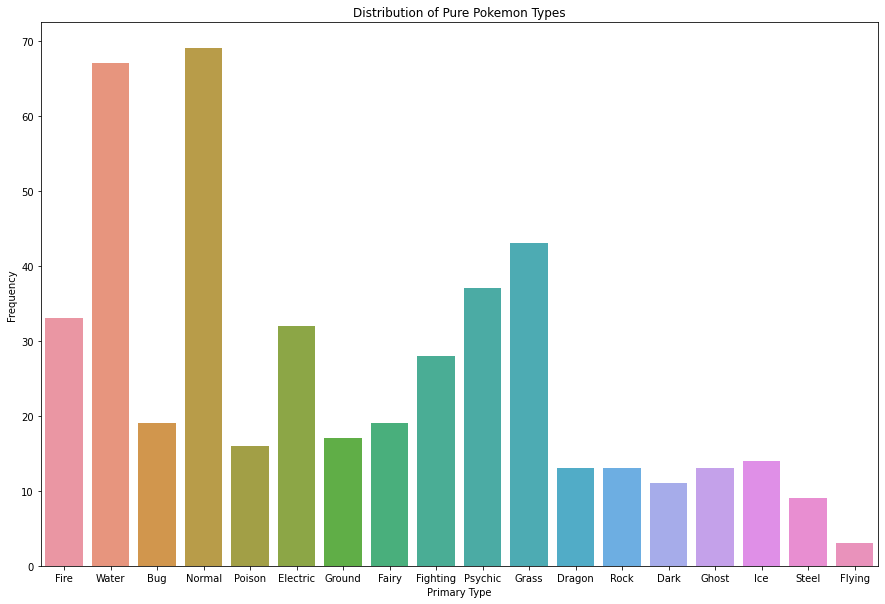

In [28]:
plt.figure(figsize=(15,10))
fig=sns.countplot(x='type1',data=pure_df)
fig.set(xlabel='Primary Type',ylabel='Frequency',title="Distribution of Pure Pokemon Types")
plt.show(fig)